# Example 11-12: System of 2nd-order ODEs

Now that we have worked with a system of 1st-order ODEs and 2nd-order ODEs (which are really just a system of 1st-order ODEs), it's time to combine the two!

## Summary of commands

No new commands are demonstrated in this exercise, as it will be very similar to [Example 11-10](11-10_RK_system_demo) and [Example 11-11](11-11_higher_order_demo).

## Moving body in a plane

Consider the following system of second-order ODEs representing a body moving in a plane.

$$ \begin{alignat}{2}
x'' &= -9x + 4y + x' + e^t - 6t^2 &&= f_1(t, x, y, x', y') \\
y'' &= 2x - 2y + 3t^2 &&= f_2(t, x, y, x', y')
\end{alignat} $$

subject to the initial conditions:

$$ x(0) = 0; \quad x'(0) = 1; \quad y(0) = -1; \quad y'(0) = -20 $$

and the $t$ range $0 \le t \le 8$.

This is a rather complex system of 2nd-order ODEs.
If we make the following substitutions (see course reader for details):

$$ \begin{alignat}{2}
x  &= z_1 \quad &&\implies \quad z_1' &&= z_3 \\
y  &= z_2 \quad &&\implies \quad z_2' &&= z_4 \\
x' &= z_3 \quad &&\implies \quad z_3' &&= -9z_1 + 4z_2 + z_3 + e^t - 6t^2 \\
y' &= z_4 \quad &&\implies \quad z_4' &&= 2z_1 - 2z_2 + 3t^2 
\end{alignat} $$

Then it is possible to solve the problem using the tools we're already familiar with.
At the end, we'll plot the $x$ and $y$ positions as a function of time, as well as the $xy$ trajectory.

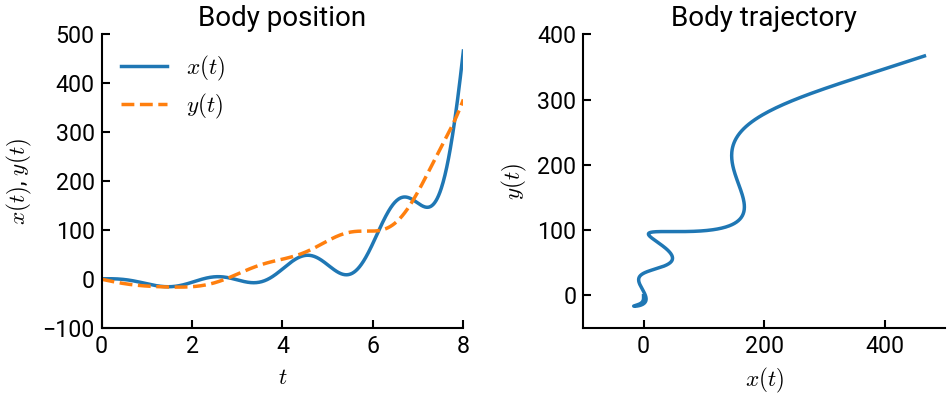

In [9]:
# import libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# define custom function: z = [x, y, x', y']
def my_func(t, z):
    zp = np.zeros(4)
    zp[0] = z[2]
    zp[1] = z[3]
    zp[2] = -9 * z[0] + 4 * z[1] + z[2] + np.exp(t) - 6 * t ** 2
    zp[3] = 2 * z[0] - 2 * z[1] + 3 * t ** 2
    return zp

# constants
t0 = 0
tf = 8
x0 = 0
xp0 = 1
y0 = -1
yp0 = -20

# solve the ODE
solver = solve_ivp(my_func, [t0, tf], [x0, y0, xp0, yp0], max_step=0.01)
t, z = solver.t, solver.y

# plot the solution
fig, ax = plt.subplots(ncols=2, figsize=(10, 4.5))
ax[0].plot(t, z[0,:], lw=2.5, label='$x(t)$')
ax[0].plot(t, z[1,:], '--', lw=2.5, label='$y(t)$')
ax[0].set(xlabel="$t$", ylabel=r"$x(t)$, $y(t)$", title="Body position",
          xlim=[t0, tf], ylim=[-100, 500])
ax[0].legend()
ax[1].plot(z[0,:], z[1,:], lw=2.5)
ax[1].set(xlabel="$x(t)$", ylabel="$y(t)$", title="Body trajectory",
          xlim=[-100, 500], ylim=[-50, 400])
fig.tight_layout()
plt.show()